In [1]:
# import all liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV File
df = pd.read_csv('UberDataset.csv')
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Data Preprocessing

In [3]:
# shape of dataset
df.shape

(1156, 7)

In [4]:
# Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
# Find Null Values
df.isna().sum()

# Find Null Values in % form
df.isna().mean()

# Find Total Null values for all Columns
df.isna().sum().sum()

np.int64(507)

In [6]:
# Fill Null Values
df['PURPOSE'].fillna('Not',inplace=True)

C:\Users\Jameel Ahmed\AppData\Local\Temp\ipykernel_9196\1298113191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('Not',inplace=True)


In [7]:
# cross varify
df['PURPOSE'].isna().sum()

np.int64(0)

In [8]:
# Change the datatype of Start Date and End Date

df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')

In [9]:
# check verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [10]:
# Extract Day Time and Hour
df['Date'] = df['START_DATE'].dt.date
df['Time'] = df['START_DATE'].dt.hour

In [11]:
df['Day-Night'] = pd.cut(x=df['Time'],bins = [0,10,15,19,24],labels = ['Morning','Afternoon','Evening','Night'])
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [12]:
# Drop Unnecessary column
# df.drop(columns=['Hour','day-night'],inplace=True)

In [13]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [14]:
# Drop all null Values 
df.dropna(inplace=True)

In [15]:
df.shape

(413, 10)

# Data Visualization

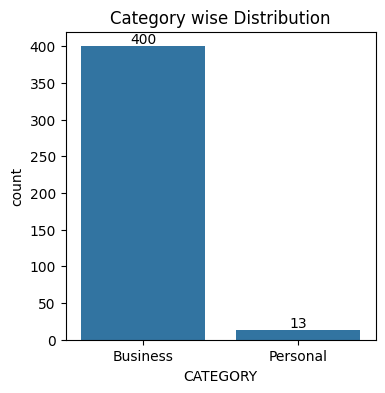

In [16]:
# Q1 in which category do people book the most uber rides?
plt.figure(figsize=(4,4))
ax = sns.countplot(x='CATEGORY', data=df)
ax.bar_label(ax.containers[0])
plt.title("Category wise Distribution")
plt.show()

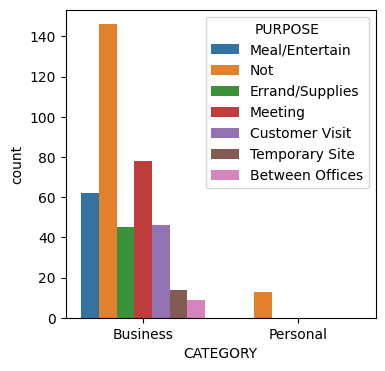

In [17]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='CATEGORY', data=df, hue='PURPOSE')
plt.show()

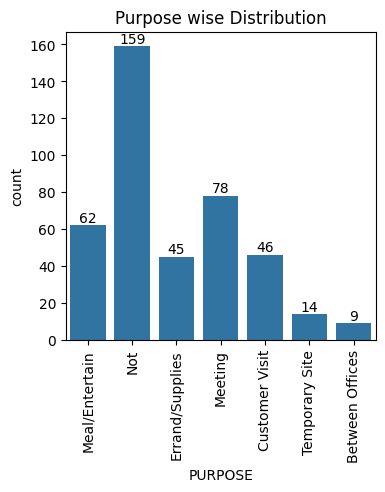

In [18]:
# Q2 For which purpose do people book rides the most? 
plt.figure(figsize=(4,4))
ax = sns.countplot(x='PURPOSE', data=df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Purpose wise Distribution")
plt.show()

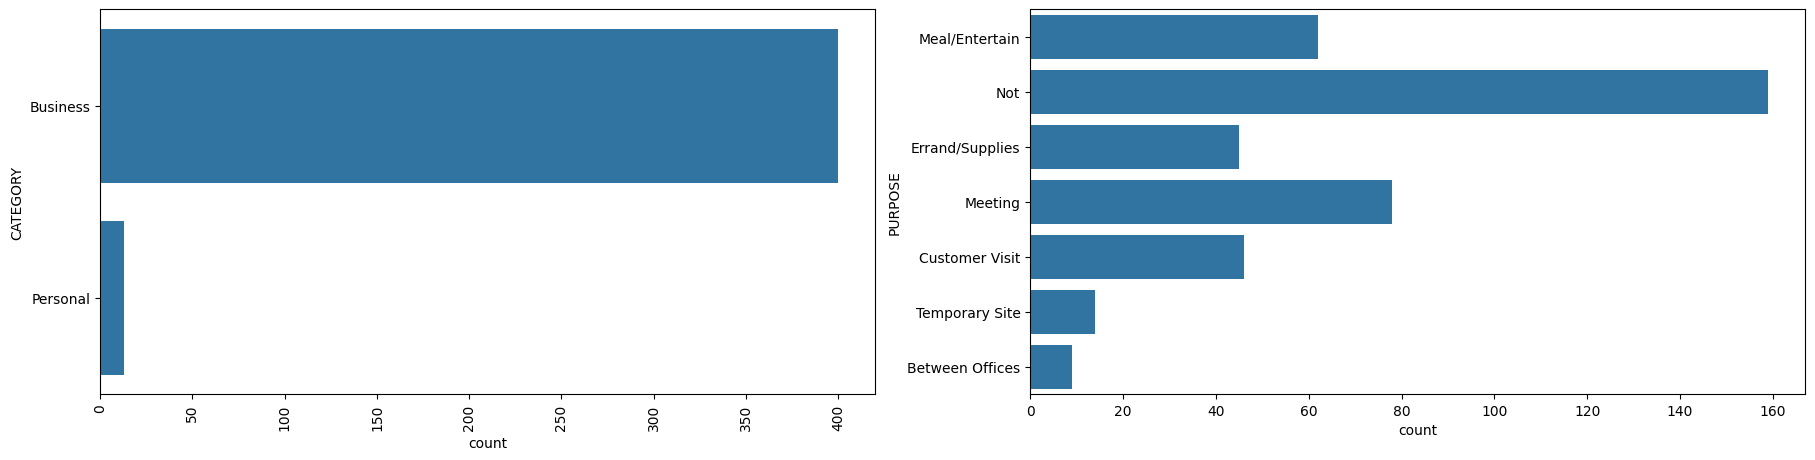

In [19]:
# Together 1,2 Questions
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.show()

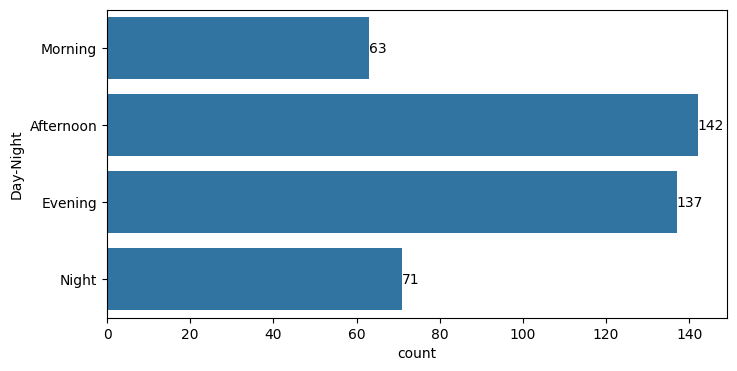

In [20]:
# Q3 At what time do people book cabs the most from uber?
plt.figure(figsize=(8,4))
ax = sns.countplot(y='Day-Night',data=df)
ax.bar_label(ax.containers[0])
plt.show()

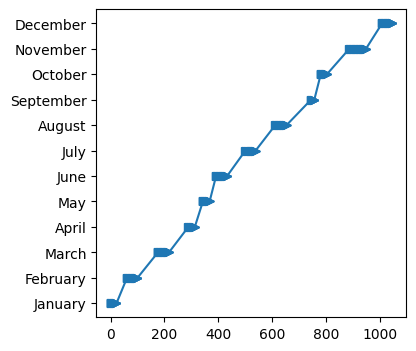

In [21]:
# Q4 In which month do people book uber rides less frequently?
plt.figure(figsize=(4,4))
df['Month_Name'] = df['START_DATE'].dt.month_name()
plt.plot(df['Month_Name'],marker='>')
plt.show()

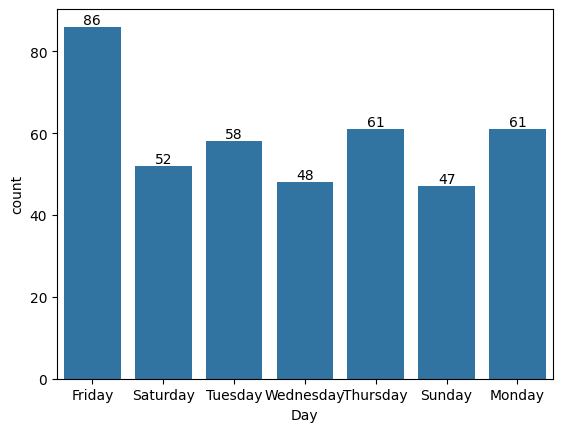

In [22]:
# Q5 On which day of the week do people book uber rides the most?
df['Day'] = df['START_DATE'].dt.day_name()
ax = sns.countplot(x='Day',data=df)
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\Jameel Ahmed\AppData\Local\Temp\ipykernel_9196\1467562078.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


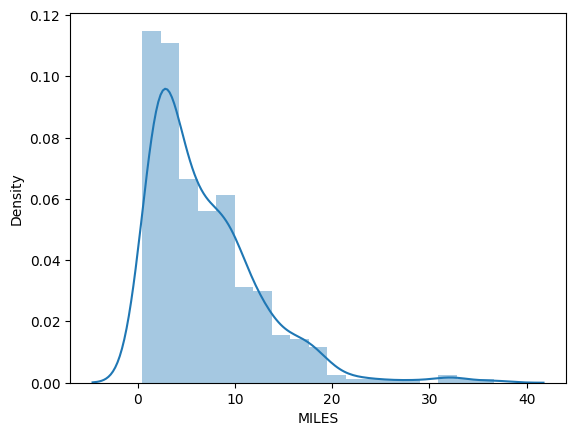

In [23]:
# Q6 How many miles do people usually book a cab for through Uber?    
sns.distplot(df[df['MILES']<40]['MILES'])
plt.show()